In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/snapfood-comments/validation.csv
/kaggle/input/snapfood-comments/train.csv
/kaggle/input/snapfood-comments/test.csv


In [2]:
data = pd.read_csv("/kaggle/input/snapfood-comments/train.csv")
data.head()


,comment,label,label_id
0,غذا خیلی سرد بود در صورتیکه فاصله ما خیلی کم است,SAD,1.0
1,بهتره بتونیم ران یا سینه رو خودمون انتخاب کنیم,HAPPY,0.0
2,غذا بد بود حالم خیییییلی بده. دل دردو دل پیچه....,SAD,1.0
3,با سلام سابق بر این بسته بندی از کیفیت بهتری ب...,SAD,1.0
4,سلام، خیلی ممنون و متشکرم,HAPPY,0.0


In [3]:
data.describe()

,label_id
count,52110.000000
mean,0.496527
std,0.499993
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Preprocess

In [4]:
!pip install -q hazm


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 14.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 97.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 90.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 1.24.3 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, but you have numpy 1.24.3 which is incompatible.
mkl-fft 1.3.8 requires numpy<1.27.0,>=1.26.4, but you have numpy 1.24.3 which is incompatible.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyar

In [6]:
from hazm import stopwords_list
sw = stopwords_list()
# from nltk.corpus import stopwords
# sw = stopwords.words('persian')

In [7]:
import string
import re 
def preprocess(text):
    text = "".join([c for c in text if c not in string.punctuation])
    tokens = re.split('\W+', text)
    sw = stopwords_list()
    return [token for token in tokens if token not in sw]

# TF-IDF

In [8]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(analyzer=preprocess)

In [14]:

X = tfidf_v.fit_transform(data['comment'])

In [13]:
# X_features = pd.DataFrame(X.toarray())
# X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,25675,25676,25677,25678,25679,25680,25681,25682,25683,25684
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.metrics import precision_score, recall_score, accuracy, confusion_matrix

In [13]:
X_train = X
y_train = data['label_id']
test_data = pd.read_csv("/kaggle/input/snapfood-comments/test.csv")

X_test = tfidf_v.transform(test_data['comment'])
y_test = test_data['label_id']

In [30]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)
lr_model = lr.fit(X, y_train)


In [31]:
y_pred = lr_model.predict(X_test)

In [36]:
print(f"Acc: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")

Acc: 0.8192184213439611
Precision: 0.801781275890638
Recall: 0.8513305476138113


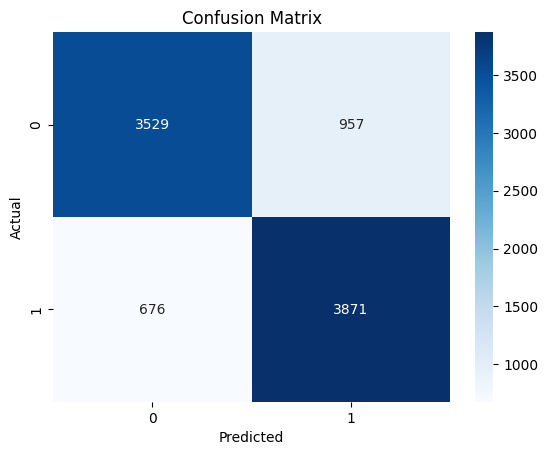

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('TF-IDF Confusion Matrix')
plt.show()

# RNN

In [38]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.1 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [39]:
!pip install -q tensorflow

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 

In [45]:
max_words = 10000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(data['comment'])

In [47]:
X_train_seq = tokenizer.texts_to_sequences(data['comment'])
X_test_seq = tokenizer.texts_to_sequences(test_data['comment'])

In [48]:

X_train_seq_padded = pad_sequences(X_train_seq)
X_test_seq_padded = pad_sequences(X_test_seq)
X_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [49]:

from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim = max_words, output_dim = 50))
model.add(LSTM(32, dropout = 0, recurrent_dropout =0))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

I0000 00:00:1764098401.008804      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764098401.009628      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [51]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy', Precision(), Recall()])

In [52]:
history = model.fit(X_train_seq_padded, y_train, 
                   batch_size = 32, epochs = 10,
                   validation_data = (X_test_seq_padded, y_test))

Epoch 1/10


I0000 00:00:1764098441.126676     150 cuda_dnn.cc:529] Loaded cuDNN version 90300


1629/1629 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.7941 - loss: 0.4279 - precision_1: 0.7677 - recall_1: 0.8493 - val_accuracy: 0.8558 - val_loss: 0.3420 - val_precision_1: 0.8212 - val_recall_1: 0.9120
Epoch 2/10
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.8775 - loss: 0.2923 - precision_1: 0.8459 - recall_1: 0.9195 - val_accuracy: 0.8566 - val_loss: 0.3410 - val_precision_1: 0.8312 - val_recall_1: 0.8975
Epoch 3/10
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8924 - loss: 0.2529 - precision_1: 0.8654 - recall_1: 0.9288 - val_accuracy: 0.8470 - val_loss: 0.3585 - val_precision_1: 0.8129 - val_recall_1: 0.9041
Epoch 4/10
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8987 - loss: 0.2396 - precision_1: 0.8789 - recall_1: 0.9243 - val_accuracy: 0.8466 - val_loss: 0.3871 - val_precision_1: 0.8245 - val_recall_1: 0.8832
Epoch 5/10
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9190 - loss: 0.1964 - precision_1: 0.9026 - recall_1:

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred_prob = model.predict(X_test_seq_padded)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
 
print(f"Acc: {accuracy_score(test_data['label_id'], y_pred)}")
print(f"Precision: {precision_score(test_data['label_id'], y_pred)}")
print(f"Recall: {recall_score(test_data['label_id'], y_pred)}") 

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Acc: 0.8176685486549319
Precision: 0.8172866520787746
Recall: 0.8214207169562349


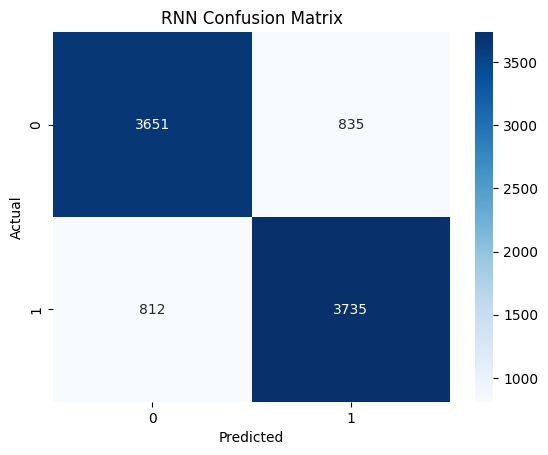

In [54]:
cm = confusion_matrix(test_data['label_id'], y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RNN Confusion Matrix')
plt.show()

# BERT

In [16]:
!pip install -U transformers

In [18]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("fill-mask", model="HooshvareLab/bert-base-parsbert-uncased")

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


In [48]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
# model = AutoModelForMaskedLM.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

# tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
model = AutoModelForSequenceClassification.from_pretrained(
    "HooshvareLab/bert-base-parsbert-uncased",
    num_labels=2,
    problem_type="single_label_classification"
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import os
os.environ['HF_TOKEN'] = 'HF'

In [21]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset

In [49]:
 # Dataset
class CommentDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=128)
        self.labels = labels.values
    
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    
    def __len__(self):
        return len(self.labels)

train_dataset = CommentDataset(data['comment'], data['label_id'].astype(int))
test_dataset = CommentDataset(test_data['comment'], test_data['label_id'].astype(int))

In [50]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    # evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
    logging_steps=100,   
    report_to="none"   
)

In [51]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

In [52]:
trainer.train()

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss
10,0.579000
20,0.402900
30,0.572500
40,0.405000
50,0.315000
60,0.369200
70,0.436400
80,0.412700
90,0.400600
100,0.379000


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


TrainOutput(global_step=4887, training_loss=0.26093874259158, metrics={'train_runtime': 2516.0985, 'train_samples_per_second': 62.132, 'train_steps_per_second': 1.942, 'total_flos': 1.02830378211072e+16, 'train_loss': 0.26093874259158, 'epoch': 3.0})

In [54]:
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(-1)


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print(f"Accuracy: {accuracy_score(test_data['label_id'], y_pred)}")
print(f"Precision: {precision_score(test_data['label_id'], y_pred)}")
print(f"Recall: {recall_score(test_data['label_id'], y_pred)}")

Accuracy: 0.8693678733532603
Precision: 0.8556940629621804
Recall: 0.890697162964592


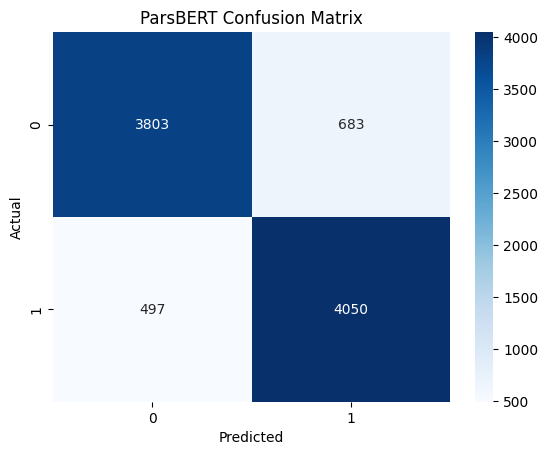

In [61]:
cm = confusion_matrix(test_data['label_id'], y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ParsBERT Confusion Matrix')
plt.show()